# installing pyspark

* https://spark.apache.org/docs/latest/api/python/getting_started/install.html

In [1]:
%pip install pyspark

# intro

PySpark supports all of Spark’s features such as Spark SQL, DataFrames, Structured Streaming, Machine Learning (MLlib) and Spark Core.

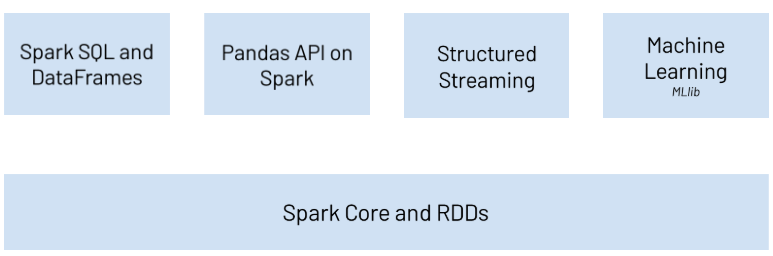

# initializing pyspark

it's almost the same thing, doesn't really matter, do it either way

## old way

this code snippet demonstrates the older way of initializing a PySpark application. The initialization involves explicitly creating a SparkConf object, configuring it, and then using it to initialize a SparkContext

In [2]:
from pyspark import SparkContext, SparkConf

SparkConf() - Configuration for a Spark application. Used to set various Spark parameters as key-value pairs.

Most of the time, you would create a SparkConf object with
SparkConf(), which will load values from spark.* Java system
properties as well. In this case, any parameters you set directly on
the SparkConf object take priority over system properties.

In [4]:
conf = SparkConf() # create a configuration

In [5]:
conf.setAppName("test app 1")

In [6]:
conf.setMaster("local[*]") # Set master URL to connect to

SparkContext() - Main entry point for Spark functionality. A SparkContext represents the connection to a Spark cluster, and can be used to create RDD and broadcast variables on that cluster.

When you create a new SparkContext, at least the master and app name should be set, either through the named parameters here or through conf

In [7]:
context = SparkContext(conf=conf)

In [8]:
context

<SparkContext master=local[*] appName=test app 1>

In [10]:
context.defaultParallelism

2

stop() - Shut down the SparkContext

In [56]:
context.stop()

## new way

While the previous way is still valid and works fine in many cases, PySpark 2.x and later versions introduced a simpler and more common approach using SparkSession, which is the preferred way to initialize Spark in newer versions.

In [57]:
from pyspark.sql import SparkSession

In [58]:
# Initialize SparkSession (implicitly creates SparkContext)
spark = SparkSession.builder \
    .appName("test app 1") \
    .master("local[*]") \
    .getOrCreate()

* SparkSession: This is the modern, unified entry point for Spark. It combines the functionality of SparkContext (for RDD operations), SQLContext (for working with DataFrames), and HiveContext (for working with Hive).

* .builder: This is used to configure the SparkSession, where you can set the app name, master URL, and other configurations.

* .getOrCreate(): This method either retrieves an existing SparkSession or creates a new one if it doesn’t already exist.

In [60]:
context = spark.sparkContext

# Spark Core and RDDs

Spark Core is the underlying general execution engine for the Spark platform that all other functionality is built on top of. It provides RDDs (Resilient Distributed Datasets) and in-memory computing capabilities.

Note that the RDD API is a low-level API which can be difficult to use and you do not get the benefit of Spark’s automatic query optimization capabilities. We recommend using DataFrames (see Spark SQL and DataFrames above) instead of RDDs as it allows you to express what you want more easily and lets Spark automatically construct the most efficient query for you.

* https://spark.apache.org/docs/latest/api/python/reference/pyspark.html
* https://spark.apache.org/docs/3.5.4/rdd-programming-guide.html

generate random data

In [12]:
import random

In [13]:
random.sample(population=range(0, 40), k=10)

[29, 1, 32, 6, 19, 22, 18, 11, 4, 7]

In [46]:
num_list = random.sample(population=range(0, 40), k=10)

parallelize() - Distribute a local Python collection to form an RDD. Using range is recommended if the input represents a range for performance.

In [61]:
rdd1 = context.parallelize(c=num_list, numSlices=4)
rdd1

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:289

collect() - Return a list that contains all the elements in this RDD.

In [62]:
rdd1.collect()

[13, 36, 17, 18, 24, 35, 1, 11, 12, 9]

In [49]:
rdd1.getNumPartitions() # number of partitions in RDD

4

glom() - Return an RDD created by coalescing all elements within each partition into a list.

In [50]:
rdd1.glom()

PythonRDD[30] at RDD at PythonRDD.scala:53

In [19]:
rdd1.glom().collect()

[[19, 9], [21, 31], [38, 17], [0, 34, 1, 25]]

take() - Take the first num elements of the RDD.

In [20]:
rdd1.glom().take(num=2)

[[19, 9], [21, 31]]

In [21]:
rdd1.count() # number of elements in this RDD

10

In [22]:
rdd1.first() # first element in this RDD

19

In [24]:
# highest values
rdd1.top(num=2) # the top N elements from an RDD

[38, 34]

In [26]:
rdd1.distinct() # distinct elements in this RDD

PythonRDD[12] at RDD at PythonRDD.scala:53

In [27]:
rdd1.distinct().collect()

[0, 9, 21, 17, 1, 25, 38, 34, 19, 31]

map() - Return a new RDD by applying a function to each element of this RDD.

In [28]:
def smt(x: float) -> float:
  return (x + 1)*3

In [29]:
rdd1.map(f= smt)

PythonRDD[18] at RDD at PythonRDD.scala:53

In [30]:
rdd1.map(f= smt).collect()

[60, 30, 66, 96, 117, 54, 3, 105, 6, 78]

In [33]:
rdd1.map(f= lambda x: (x+1)*3).collect()

[60, 30, 66, 96, 117, 54, 3, 105, 6, 78]

In [34]:
from typing import Callable

# Define the lambda with its expected type
f: Callable[[int], int] = lambda x: (x+1)*3

In [35]:
rdd1.map(f=f).collect()

[60, 30, 66, 96, 117, 54, 3, 105, 6, 78]

In [42]:
rdd1.map(f= lambda x: x%3 == 0).collect() # divisible by 3

[False, True, True, False, False, False, True, False, False, False]

filter() - Return a new RDD containing only the elements that satisfy a predicate

In [38]:
rdd1.filter(f= lambda x: x%3 == 0).collect()

[9, 21, 0]

In [41]:
rdd1.filter(f= lambda x: x%3 == 0).glom().collect()

[[9], [21], [], [0]]

In [43]:
rdd1.map(f= lambda x: [x+1, x+2]).collect()

[[20, 21],
 [10, 11],
 [22, 23],
 [32, 33],
 [39, 40],
 [18, 19],
 [1, 2],
 [35, 36],
 [2, 3],
 [26, 27]]

flatMap() - Return a new RDD by first applying a function to all elements
of this RDD, and then flattening the results

In [44]:
rdd1.flatMap(f= lambda x: [x+1, x+2]).collect()

[20, 21, 10, 11, 22, 23, 32, 33, 39, 40, 18, 19, 1, 2, 35, 36, 2, 3, 26, 27]

In [45]:
rdd1.flatMap(f= lambda x: [x+1, x+2], preservesPartitioning=True).collect()

[20, 21, 10, 11, 22, 23, 32, 33, 39, 40, 18, 19, 1, 2, 35, 36, 2, 3, 26, 27]

reduce() - Reduces the elements of this RDD using the specified commutative and associative binary operator.

In [52]:
nums = [4, 8, 15, 16, 23, 42]

In [64]:
# Create the RDD
rdd = context.parallelize(nums)

In [65]:
# 1. Calculate the sum using reduce
total_sum = rdd.reduce(lambda a, b: a + b)
total_sum

108

In [66]:
# 2. Calculate the maximum using reduce
max_value = rdd.reduce(lambda a, b: a if a > b else b)
max_value

42

In [68]:
print(rdd.max())
print(rdd.min())
print(rdd.mean())
print(rdd.stdev())
print(round(rdd.stdev(), 2))
print(rdd.sum())

42
4
18.0
12.315302134607444
12.32
108


In [69]:
def sum_of_partition(iterator):
    # Return the sum as an iterable (generator)
    yield sum(iterator) # it has to be yield, cannot be return

In [70]:
data = list(range(1, 11))  # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rdd = context.parallelize(data, numSlices=3)  # We are creating 3 partitions

In [73]:
rdd.glom().collect()

[[1, 2, 3], [4, 5, 6], [7, 8, 9, 10]]

In [71]:
# Apply the function
partition_sums_rdd = rdd.mapPartitions(sum_of_partition)

In [72]:
# Collect and print the results
partition_sums = partition_sums_rdd.collect()
print("Sum of each partition:", partition_sums)

Sum of each partition: [6, 15, 34]


# SparkSQL and the DataFrame API

Spark SQL is Apache Spark’s module for working with structured data.

* https://spark.apache.org/docs/latest/api/python/getting_started/quickstart_df.html
* https://spark.apache.org/docs/3.5.4/sql-programming-guide.html

other
* https://mybinder.org/v2/gh/apache/spark/a6f220d9517?filepath=python%2Fdocs%2Fsource%2Fgetting_started%2Fquickstart_df.ipynb
* https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/index.html

## DataFrame creation
* by passing a list of lists, tuples, dictionaries and pyspark.sql.Rows, a pandas DataFrame and an RDD consisting of such a list

In [94]:
data = [("John", 25), ("Alice", None), (None, 30), ("Bob", 40)]
columns = ["Name", "Age"]

In [95]:
# Create DataFrame
df2 = spark.createDataFrame(data, columns)

In [132]:
df_fruits = spark.createDataFrame([
    ['red', 'banana', 1, 10], ['blue', 'banana', 2, 20], ['red', 'carrot', 3, 30],
    ['blue', 'grape', 4, 40], ['red', 'carrot', 5, 50], ['black', 'carrot', 6, 60],
    ['red', 'banana', 7, 70], ['red', 'grape', 8, 80]], schema=['color', 'fruit', 'v1', 'v2'])
df_fruits.show()

+-----+------+---+---+
|color| fruit| v1| v2|
+-----+------+---+---+
|  red|banana|  1| 10|
| blue|banana|  2| 20|
|  red|carrot|  3| 30|
| blue| grape|  4| 40|
|  red|carrot|  5| 50|
|black|carrot|  6| 60|
|  red|banana|  7| 70|
|  red| grape|  8| 80|
+-----+------+---+---+



## data input/output

CSV is straightforward and easy to use. Parquet and ORC are efficient and compact file formats to read and write faster.

There are many other data sources available in PySpark such as JDBC, text, binaryFile, Avro, etc.

```python
# CSV
df.write.csv('foo.csv', header=True)
spark.read.csv('foo.csv', header=True).show()

# Parquet
df.write.parquet('bar.parquet')
spark.read.parquet('bar.parquet').show()

# ORC
df.write.orc('zoo.orc')
spark.read.orc('zoo.orc').show()
```

In [74]:
# https://www.kaggle.com/datasets/thec03u5/fifa-18-demo-player-dataset

In [76]:
spark.read.format('csv').load("CompleteDataset.csv")

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string, _c12: string, _c13: string, _c14: string, _c15: string, _c16: string, _c17: string, _c18: string, _c19: string, _c20: string, _c21: string, _c22: string, _c23: string, _c24: string, _c25: string, _c26: string, _c27: string, _c28: string, _c29: string, _c30: string, _c31: string, _c32: string, _c33: string, _c34: string, _c35: string, _c36: string, _c37: string, _c38: string, _c39: string, _c40: string, _c41: string, _c42: string, _c43: string, _c44: string, _c45: string, _c46: string, _c47: string, _c48: string, _c49: string, _c50: string, _c51: string, _c52: string, _c53: string, _c54: string, _c55: string, _c56: string, _c57: string, _c58: string, _c59: string, _c60: string, _c61: string, _c62: string, _c63: string, _c64: string, _c65: string, _c66: string, _c67: string, _c68: string, _c69: string, _c70: string, _c71: 

In [75]:
spark.read.csv("CompleteDataset.csv")

DataFrame[_c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string, _c12: string, _c13: string, _c14: string, _c15: string, _c16: string, _c17: string, _c18: string, _c19: string, _c20: string, _c21: string, _c22: string, _c23: string, _c24: string, _c25: string, _c26: string, _c27: string, _c28: string, _c29: string, _c30: string, _c31: string, _c32: string, _c33: string, _c34: string, _c35: string, _c36: string, _c37: string, _c38: string, _c39: string, _c40: string, _c41: string, _c42: string, _c43: string, _c44: string, _c45: string, _c46: string, _c47: string, _c48: string, _c49: string, _c50: string, _c51: string, _c52: string, _c53: string, _c54: string, _c55: string, _c56: string, _c57: string, _c58: string, _c59: string, _c60: string, _c61: string, _c62: string, _c63: string, _c64: string, _c65: string, _c66: string, _c67: string, _c68: string, _c69: string, _c70: string, _c71: 

In [79]:
df1 = spark.read.csv("CompleteDataset.csv", header=True, inferSchema=True)

In [80]:
df1.head()

Row(_c0=0, Name='Cristiano Ronaldo', Age=32, Photo='https://cdn.sofifa.org/48/18/players/20801.png', Nationality='Portugal', Flag='https://cdn.sofifa.org/flags/38.png', Overall=94, Potential=94, Club='Real Madrid CF', Club Logo='https://cdn.sofifa.org/24/18/teams/243.png', Value='€95.5M', Wage='€565K', Special=2228, Acceleration='89', Aggression='63', Agility='89', Balance='63', Ball control='93', Composure='95', Crossing='85', Curve='81', Dribbling='91', Finishing='94', Free kick accuracy='76', GK diving='7', GK handling='11', GK kicking='15', GK positioning='14', GK reflexes='11', Heading accuracy='88', Interceptions='29', Jumping='95', Long passing='77', Long shots='92', Marking='22', Penalties='85', Positioning='95', Reactions='96', Short passing='83', Shot power='94', Sliding tackle='23', Sprint speed='91', Stamina='92', Standing tackle='31', Strength='80', Vision='85', Volleys='88', CAM=89.0, CB=53.0, CDM=62.0, CF=91.0, CM=82.0, ID=20801, LAM=89.0, LB=61.0, LCB=53.0, LCM=82.0, LD

## viewing data

In [81]:
df1.show() # Prints the first n rows to the console

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [117]:
df1.show(1, vertical=True)

-RECORD 0-----------------------------------
 _c0                 | 0                    
 Name                | Cristiano Ronaldo    
 Age                 | 32                   
 Photo               | https://cdn.sofif... 
 Nationality         | Portugal             
 Flag                | https://cdn.sofif... 
 Overall             | 94                   
 Potential           | 94                   
 Club                | Real Madrid CF       
 Club Logo           | https://cdn.sofif... 
 Value               | €95.5M               
 Wage                | €565K                
 Special             | 2228                 
 Acceleration        | 89                   
 Aggression          | 63                   
 Agility             | 89                   
 Balance             | 63                   
 Ball control        | 93                   
 Composure           | 95                   
 Crossing            | 85                   
 Curve               | 81                   
 Dribbling

In [118]:
df1.columns

['_c0',
 'Name',
 'Age',
 'Photo',
 'Nationality',
 'Flag',
 'Overall',
 'Potential',
 'Club',
 'Club Logo',
 'Value',
 'Wage',
 'Special',
 'Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'Ball control',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Free kick accuracy',
 'GK diving',
 'GK handling',
 'GK kicking',
 'GK positioning',
 'GK reflexes',
 'Heading accuracy',
 'Interceptions',
 'Jumping',
 'Long passing',
 'Long shots',
 'Marking',
 'Penalties',
 'Positioning',
 'Reactions',
 'Short passing',
 'Shot power',
 'Sliding tackle',
 'Sprint speed',
 'Stamina',
 'Standing tackle',
 'Strength',
 'Vision',
 'Volleys',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'ID',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'Preferred Positions',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST']

In [119]:
df1.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


In [82]:
df1.rdd

MapPartitionsRDD[82] at javaToPython at NativeMethodAccessorImpl.java:0

In [83]:
df1.rdd.getNumPartitions()

2

In [101]:
df2 = df1.repartition(numPartitions=4)

In [102]:
df2.rdd.getNumPartitions()

4

## manipulating dataframes

### renaming columns

In [103]:
# rename columns
df2 = df2.withColumnRenamed("_c0", "column0")
df2.show()

+-------+-------------+---+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|column0|         Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK han

### dealing with null values
* replace null with a specific value

In [106]:
df2.na.fill(subset="RAM", value=10).show()

+-------+-------------+---+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|column0|         Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK han

In [90]:
df2.na.fill({"RAM": 10, "RB": 1}).show()

+-----+-------------+---+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|   ID|         Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handlin

In [104]:
# Drop rows where any value is null
df2.na.drop().show()

+-------+--------------+---+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+-----+----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|column0|          Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|                Club|           Club Logo|Value|Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handl

In [105]:
# Drop rows where 'Age' column is null
df2.na.drop(subset=["Age"]).show()

+-------+-------------+---+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|column0|         Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK han

### selecting

In [107]:
# SELECT DISTINCT
df2.select(["Name", "Age"]).distinct().show()

+---------------+---+
|           Name|Age|
+---------------+---+
|    B. Janeczek| 25|
|     R. Fennell| 28|
|     K. Lejeune| 32|
|   E. Gigliotti| 30|
|      M. Brighi| 36|
|      S. Dawson| 31|
|         Angulo| 33|
|     D. Barinov| 20|
|       D. Ortiz| 24|
|   S. Rasmussen| 34|
|    Raúl Cámara| 33|
|Pablo Hernández| 32|
|       M. Oyola| 34|
|   Pedro Júnior| 30|
|       P. Sabak| 18|
|         Guedes| 30|
|     Pombaxinho| 33|
|       L. López| 34|
|    M. Petković| 24|
|     M. Quiroga| 27|
+---------------+---+
only showing top 20 rows



In [120]:
df2.select("Name", "Age").describe().show()

+-------+-------------+------------------+
|summary|         Name|               Age|
+-------+-------------+------------------+
|  count|        17981|             17981|
|   mean|         NULL|25.144541460430453|
| stddev|         NULL| 4.614272345005097|
|    min|     A. Abbas|                16|
|    max|Óscar Whalley|                47|
+-------+-------------+------------------+



PySpark DataFrame is lazily evaluated and simply selecting a column does not trigger the computation but it returns a Column instance

In [123]:
df2.Name

Column<'Name'>

In [126]:
df2["Name"]

Column<'Name'>

These Columns can be used to select the columns from a DataFrame.

In [125]:
df2.select(df2.Name).show()

+-------------+
|         Name|
+-------------+
|   T. Elliott|
|  A. Jacobson|
|     J. Walsh|
|S. Anđelković|
|     F. Ricca|
|   D. Zagadou|
|   J. Narváez|
| J. Mondragón|
|      A. Nabi|
|    F. Andone|
|    C. Porter|
|     P. Erras|
|   S. Ghoddos|
|      G. Kyei|
|  M. Jevtović|
|L. Verstraete|
|     B. McKay|
|  I. Malcorra|
|    S. Ameobi|
|   L. Štetina|
+-------------+
only showing top 20 rows



### creating a column

Assign new Column instance with withColumn() - Returns a new DataFrame by adding a column or replacing the existing column that has the same name.

In [127]:
from pyspark.sql.functions import upper

In [128]:
df2.withColumn('uppercase_name', upper(df2.Name)).show()

+-------+-------------+---+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+--------------+
|column0|         Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|G

### filtering

To select a subset of rows, use DataFrame.filter()

In [108]:
# WHERE clause
df2.filter(condition=df2["Overall"] > 70).show()

+-------+------------+---+--------------------+-------------------+--------------------+-------+---------+--------------------+--------------------+-----+----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|column0|        Name|Age|               Photo|        Nationality|                Flag|Overall|Potential|                Club|           Club Logo|Value|Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|

In [110]:
df2.where(condition=df2["Overall"] > 70).show() # where is an alias for filter

+-------+------------+---+--------------------+-------------------+--------------------+-------+---------+--------------------+--------------------+-----+----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|column0|        Name|Age|               Photo|        Nationality|                Flag|Overall|Potential|                Club|           Club Logo|Value|Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|

In [109]:
df2.select(["Overall", "Name"]).filter(condition=df2["Overall"] > 70).show()

+-------+------------+
|Overall|        Name|
+-------+------------+
|     76|     José Sá|
|     79|        Keko|
|     82| A. Florenzi|
|     80|    Jemerson|
|     73|       Assis|
|     71|     A. Özek|
|     72|  E. Alioski|
|     72|    R. Kruse|
|     74|   N. Rigoni|
|     71|M. te Wierik|
|     79|   M. Arnold|
|     71|   J. Jernal|
|     71|    D. Royer|
|     75| L. Refaelov|
|     73|   M. Lustig|
|     75|    A. Nouri|
|     74|M. Galvarado|
|     80| L. Podolski|
|     72| R. Majewski|
|     75|   F. Chiesa|
+-------+------------+
only showing top 20 rows



### grouping, sorting

In [114]:
selected_df = df2.select(["Name", "Age"])   # Step 1: Select columns
filtered_df = selected_df.filter(df2["Overall"] > 70)  # Step 2: Apply filter
grouped_df = filtered_df.groupBy("Age")  # Step 3: Group by specific columns
counted_df = grouped_df.count()  # Step 4: Count groups
sorted_df = counted_df.sort("Age", ascending=True)  # Step 5: Sort the results

# Show the final result
sorted_df.show()

+---+-----+
|Age|count|
+---+-----+
| 17|    1|
| 18|   13|
| 19|   41|
| 20|  105|
| 21|  160|
| 22|  246|
| 23|  296|
| 24|  369|
| 25|  486|
| 26|  418|
| 27|  444|
| 28|  395|
| 29|  474|
| 30|  359|
| 31|  272|
| 32|  206|
| 33|  283|
| 34|  101|
| 35|   74|
| 36|   57|
+---+-----+
only showing top 20 rows



In [133]:
df_fruits.groupby('color').avg().show()

+-----+-------+-------+
|color|avg(v1)|avg(v2)|
+-----+-------+-------+
|  red|    4.8|   48.0|
| blue|    3.0|   30.0|
|black|    6.0|   60.0|
+-----+-------+-------+



### applying functions

PySpark supports various UDFs and APIs to allow users to execute Python native functions.

In [129]:
import pandas as pd
from pyspark.sql.functions import pandas_udf

In [130]:
@pandas_udf('long')
def pandas_plus_one(series: pd.Series) -> pd.Series:
    # Simply plus one by using pandas Series.
    return series + 1

df1.select(pandas_plus_one(df1.Age)).show()

+--------------------+
|pandas_plus_one(Age)|
+--------------------+
|                  33|
|                  31|
|                  26|
|                  31|
|                  32|
|                  29|
|                  27|
|                  27|
|                  28|
|                  30|
|                  32|
|                  27|
|                  26|
|                  29|
|                  32|
|                  28|
|                  30|
|                  33|
|                  40|
|                  24|
+--------------------+
only showing top 20 rows



In [131]:
def pandas_filter_func(iterator):
    for pandas_df in iterator:
        yield pandas_df[pandas_df.Age == 18]

df1.mapInPandas(pandas_filter_func, schema=df1.schema).show()

+----+-------------------+---+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+------+----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
| _c0|               Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value|Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK

### collect(), take(), toPandas()

DataFrame.collect() collects the distributed data to the driver side as the local data in Python. Note that this can throw an out-of-memory error when the dataset is too large to fit in the driver side because it collects all the data from executors to the driver side.

In [121]:
sorted_df.collect()

[Row(Age=17, count=1),
 Row(Age=18, count=13),
 Row(Age=19, count=41),
 Row(Age=20, count=105),
 Row(Age=21, count=160),
 Row(Age=22, count=246),
 Row(Age=23, count=296),
 Row(Age=24, count=369),
 Row(Age=25, count=486),
 Row(Age=26, count=418),
 Row(Age=27, count=444),
 Row(Age=28, count=395),
 Row(Age=29, count=474),
 Row(Age=30, count=359),
 Row(Age=31, count=272),
 Row(Age=32, count=206),
 Row(Age=33, count=283),
 Row(Age=34, count=101),
 Row(Age=35, count=74),
 Row(Age=36, count=57),
 Row(Age=37, count=27),
 Row(Age=38, count=14),
 Row(Age=39, count=6),
 Row(Age=40, count=4),
 Row(Age=44, count=1)]

In order to avoid throwing an out-of-memory exception, use DataFrame.take() or DataFrame.tail()

In [122]:
df1.take(1) # Returns the first num rows as a list of Row

[Row(_c0=0, Name='Cristiano Ronaldo', Age=32, Photo='https://cdn.sofifa.org/48/18/players/20801.png', Nationality='Portugal', Flag='https://cdn.sofifa.org/flags/38.png', Overall=94, Potential=94, Club='Real Madrid CF', Club Logo='https://cdn.sofifa.org/24/18/teams/243.png', Value='€95.5M', Wage='€565K', Special=2228, Acceleration='89', Aggression='63', Agility='89', Balance='63', Ball control='93', Composure='95', Crossing='85', Curve='81', Dribbling='91', Finishing='94', Free kick accuracy='76', GK diving='7', GK handling='11', GK kicking='15', GK positioning='14', GK reflexes='11', Heading accuracy='88', Interceptions='29', Jumping='95', Long passing='77', Long shots='92', Marking='22', Penalties='85', Positioning='95', Reactions='96', Short passing='83', Shot power='94', Sliding tackle='23', Sprint speed='91', Stamina='92', Standing tackle='31', Strength='80', Vision='85', Volleys='88', CAM=89.0, CB=53.0, CDM=62.0, CF=91.0, CM=82.0, ID=20801, LAM=89.0, LB=61.0, LCB=53.0, LCM=82.0, L

toPandas() also collects all data into the driver side that can easily cause an out-of-memory-error when the data is too large to fit into the driver side.

In [115]:
# convert to pandas dataframe
pandas_df = sorted_df.toPandas()
pandas_df.head()

,Age,count
0,17,1
1,18,13
2,19,41
3,20,105
4,21,160


## SQL

DataFrame and Spark SQL share the same execution engine so they can be interchangeably used seamlessly. For example, you can register the DataFrame as a table and run a SQL query

eg. using Spark SQL with a Temporary Table

createOrReplaceTempView() - creates or replaces a local temporary view with this DataFrame. The lifetime of this temporary table is tied to the SparkSession that was used to create this DataFrame

In [134]:
# A list of employees with their names, departments, and salaries.
# Sample data
data = [("John", "HR", 3000),
        ("Alice", "Finance", 4000),
        ("Bob", "IT", 5000),
        ("Eve", "HR", 3500),
        ("Charlie", "IT", 7000)]

columns = ["Name", "Department", "Salary"]

# Create a DataFrame
df = spark.createDataFrame(data, columns)

In [135]:
# Register the DataFrame as a SQL table
df.createOrReplaceTempView("employees")

In [136]:
# Run a SQL query
spark.sql("""
    SELECT Department, AVG(Salary) AS avg_salary
    FROM employees
    GROUP BY Department
    ORDER BY avg_salary DESC
""").show()

+----------+----------+
|Department|avg_salary|
+----------+----------+
|        IT|    6000.0|
|   Finance|    4000.0|
|        HR|    3250.0|
+----------+----------+



eg. registering a Pandas UDF and using it in SQL

In [137]:
from pyspark.sql.functions import pandas_udf
import pandas as pd

In [138]:
# Define a Pandas UDF to classify employees
@pandas_udf("string")
def salary_category(salary: pd.Series) -> pd.Series:
    return salary.apply(lambda x: "High" if x > 4000 else "Low")

In [139]:
# Register the UDF with Spark SQL
spark.udf.register("salary_category", salary_category)

In [140]:
# Use the UDF in a SQL query
spark.sql("""
    SELECT Name, Department, Salary, salary_category(Salary) AS Category
    FROM employees
""").show()

+-------+----------+------+--------+
|   Name|Department|Salary|Category|
+-------+----------+------+--------+
|   John|        HR|  3000|     Low|
|  Alice|   Finance|  4000|     Low|
|    Bob|        IT|  5000|    High|
|    Eve|        HR|  3500|     Low|
|Charlie|        IT|  7000|    High|
+-------+----------+------+--------+



eg. mixing SQL expressions with PySpark Columns

In [141]:
from pyspark.sql.functions import expr

In [142]:
# Calculate total salary per department
df_total_salary = df.groupBy("Department").agg(expr("SUM(Salary) AS TotalSalary"))

# Check if the total salary exceeds a threshold (e.g., 10000)
df_total_salary = df_total_salary.withColumn("Exceeds_Threshold", expr("TotalSalary > 10000"))

df_total_salary.show()

+----------+-----------+-----------------+
|Department|TotalSalary|Exceeds_Threshold|
+----------+-----------+-----------------+
|        HR|       6500|            false|
|   Finance|       4000|            false|
|        IT|      12000|             true|
+----------+-----------+-----------------+



eg. using selectExpr with custom SQL Expressions

In [143]:
# Use selectExpr to compute new salary
df_with_bonus = df.selectExpr("Name", "Department", "Salary", "Salary * 1.1 AS NewSalary")

df_with_bonus.show()

+-------+----------+------+---------+
|   Name|Department|Salary|NewSalary|
+-------+----------+------+---------+
|   John|        HR|  3000|   3300.0|
|  Alice|   Finance|  4000|   4400.0|
|    Bob|        IT|  5000|   5500.0|
|    Eve|        HR|  3500|   3850.0|
|Charlie|        IT|  7000|   7700.0|
+-------+----------+------+---------+



# pandas API on Spark

Pandas API on Spark allows you to scale your pandas workload to any size by running it distributed across multiple nodes. If you are already familiar with pandas and want to leverage Spark for big data, pandas API on Spark makes you immediately productive and lets you migrate your applications without modifying the code. You can have a single codebase that works both with pandas (tests, smaller datasets) and with Spark (production, distributed datasets) and you can switch between the pandas API and the Pandas API on Spark easily and without overhead.

* https://spark.apache.org/docs/latest/api/python/getting_started/quickstart_ps.html

other
* https://mybinder.org/v2/gh/apache/spark/a6f220d9517?filepath=python%2Fdocs%2Fsource%2Fgetting_started%2Fquickstart_ps.ipynb
* https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/index.html

key differences between pandas and pandas API on Spark.

Customarily, we import pandas API on Spark as follows

In [144]:
import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [ ]:
# TODO

# Structured Streaming API

Structured Streaming is a scalable and fault-tolerant stream processing engine built on the Spark SQL engine. You can express your streaming computation the same way you would express a batch computation on static data. The Spark SQL engine will take care of running it incrementally and continuously and updating the final result as streaming data continues to arrive.

* https://spark.apache.org/docs/latest/structured-streaming-programming-guide.html
* https://spark.apache.org/docs/latest/api/python/reference/pyspark.ss/index.html
* https://spark.apache.org/docs/3.5.4/structured-streaming-programming-guide.html

In [ ]:
# TODO

# Machine Learning (MLlib)

Built on top of Spark, MLlib is a scalable machine learning library that provides a uniform set of high-level APIs that help users create and tune practical machine learning pipelines.

* https://spark.apache.org/docs/latest/ml-guide.html
* https://spark.apache.org/docs/latest/api/python/reference/pyspark.ml.html
* https://spark.apache.org/docs/3.5.4/ml-guide.html

In [ ]:
# TODO

## Spark Streaming (Legacy)

Spark Streaming is an extension of the core Spark API that enables scalable, high-throughput, fault-tolerant stream processing of live data streams.

Note that Spark Streaming is the previous generation of Spark’s streaming engine. It is a legacy project and it is no longer being updated. There is a newer and easier to use streaming engine in Spark called Structured Streaming which you should use for your streaming applications and pipelines.

* https://spark.apache.org/docs/latest/streaming-programming-guide.html
* https://spark.apache.org/docs/latest/api/python/reference/pyspark.streaming.html
* https://spark.apache.org/docs/3.5.4/streaming-programming-guide.html

# Spark Connect

Spark Connect introduced a decoupled client-server architecture for Spark that allows remote connectivity to Spark clusters using the DataFrame API.

* https://spark.apache.org/docs/latest/api/python/getting_started/quickstart_connect.html

In [ ]:
# TODO